In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import calc_footprint_FFP_climatology as myfootprint
import pandas as pd
df=pd.read_csv('Kljun_input_files/fp_2019_30m.csv', sep=',')
df.dropna()
df2=df.dropna()

In [2]:
df2

,yyyy,mm,day,HH_UTC,MM,zm,d,u_mean,L,sigma_v,u_star,wind_dir
0,2019,1,1,0,15,30,13.4,3.91669,1429.020,2.811650,0.866387,159.203
1,2019,1,1,0,45,30,13.4,4.02904,1102.330,2.204040,0.807389,160.211
2,2019,1,1,1,15,30,13.4,3.97690,1477.790,2.344680,0.865246,160.174
3,2019,1,1,1,45,30,13.4,3.98183,1795.190,2.527010,0.911457,159.303
4,2019,1,1,2,15,30,13.4,4.56773,2804.590,2.910160,1.039050,159.646
...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2019,12,31,21,45,30,13.4,3.27617,862.068,1.555620,0.750154,308.847
17516,2019,12,31,22,15,30,13.4,2.71736,496.411,1.059160,0.608744,304.494
17517,2019,12,31,22,45,30,13.4,2.56340,354.144,0.954489,0.582222,289.041
17518,2019,12,31,23,15,30,13.4,2.70149,240.676,0.791386,0.498523,282.319


In [3]:
df2.dtypes

yyyy          int64
mm            int64
day           int64
HH_UTC        int64
MM            int64
zm            int64
d           float64
u_mean      float64
L           float64
sigma_v     float64
u_star      float64
wind_dir    float64
dtype: object

In [4]:
df3=df2.loc[df2['u_star']>= 0.2]

In [5]:
df3

,yyyy,mm,day,HH_UTC,MM,zm,d,u_mean,L,sigma_v,u_star,wind_dir
0,2019,1,1,0,15,30,13.4,3.91669,1429.020,2.811650,0.866387,159.203
1,2019,1,1,0,45,30,13.4,4.02904,1102.330,2.204040,0.807389,160.211
2,2019,1,1,1,15,30,13.4,3.97690,1477.790,2.344680,0.865246,160.174
3,2019,1,1,1,45,30,13.4,3.98183,1795.190,2.527010,0.911457,159.303
4,2019,1,1,2,15,30,13.4,4.56773,2804.590,2.910160,1.039050,159.646
...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2019,12,31,21,45,30,13.4,3.27617,862.068,1.555620,0.750154,308.847
17516,2019,12,31,22,15,30,13.4,2.71736,496.411,1.059160,0.608744,304.494
17517,2019,12,31,22,45,30,13.4,2.56340,354.144,0.954489,0.582222,289.041
17518,2019,12,31,23,15,30,13.4,2.70149,240.676,0.791386,0.498523,282.319


In [9]:
df3['zma'] = df3['zm']-df3['d']

<ipython-input-9-a50893d3d31d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['zma'] = df3['zm']-df3['d']


In [10]:
zma = df3.zma.tolist()
z0a = None
umeana = df3.u_mean.tolist()
ha = [1000.] * len(df3.u_mean.values)
ola = df3.L.tolist()
sigmava = df3.sigma_v.tolist()
ustara = df3.u_star.tolist()
wind_dira=df3.wind_dir.tolist()

# here some playing with the grid of the Kljun model

dxy = 3.    # grid cell size in m


Alert(0014):
 No valid z0 passed, using umean.
 Execution continues.

Calculating footprint  1  of  13843
Calculating footprint  693  of  13843
Calculating footprint  1385  of  13843
Calculating footprint  2077  of  13843
Calculating footprint  2769  of  13843
Calculating footprint  3461  of  13843
Calculating footprint  4153  of  13843
Calculating footprint  4845  of  13843
Calculating footprint  5537  of  13843
Calculating footprint  6229  of  13843
Calculating footprint  6921  of  13843
Calculating footprint  7613  of  13843
Calculating footprint  8305  of  13843
Calculating footprint  8997  of  13843
Calculating footprint  9689  of  13843
Calculating footprint  10381  of  13843
Calculating footprint  11073  of  13843
Calculating footprint  11765  of  13843
Calculating footprint  12457  of  13843
Calculating footprint  13149  of  13843
Calculating footprint  13841  of  13843


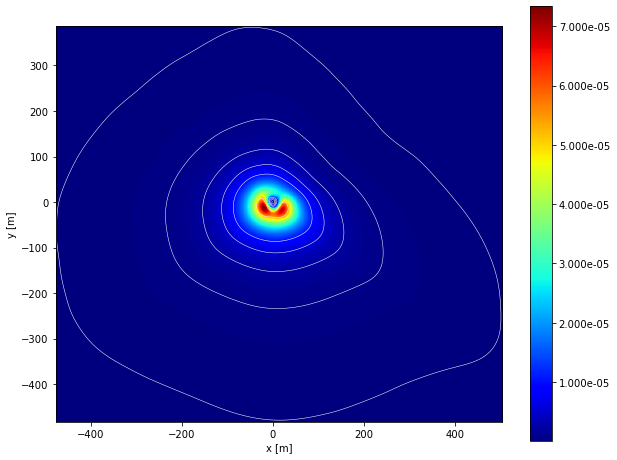

--- 132.1644802093506 seconds ---


In [97]:
# Running the Kljun model with an ensemble of three dummy data sets

import time
start_time = time.time()

FFP = myfootprint.FFP_climatology(zm=zma,
                                  umean=umeana,
                                  h=ha,
                                  ol=ola,
                                  sigmav=sigmava,
                                  ustar=ustara,
                                  wind_dir=wind_dira,
                                  domain=[-600., 600., -600., 600.],
                                  rs=[10., 50., 60., 70., 80., 90.],
                                  dx=dxy,
                                  dy=dxy,
                                  smooth_data=0,
                                  crop=True,
                                  fig=True
                                 )
print("--- %s seconds ---" % (time.time() - start_time))


Alert(0014):
 No valid z0 passed, using umean.
 Execution continues.

Calculating footprint  1  of  13843
Calculating footprint  693  of  13843
Calculating footprint  1385  of  13843
Calculating footprint  2077  of  13843
Calculating footprint  2769  of  13843
Calculating footprint  3461  of  13843
Calculating footprint  4153  of  13843
Calculating footprint  4845  of  13843
Calculating footprint  5537  of  13843
Calculating footprint  6229  of  13843
Calculating footprint  6921  of  13843
Calculating footprint  7613  of  13843
Calculating footprint  8305  of  13843
Calculating footprint  8997  of  13843
Calculating footprint  9689  of  13843
Calculating footprint  10381  of  13843
Calculating footprint  11073  of  13843
Calculating footprint  11765  of  13843
Calculating footprint  12457  of  13843
Calculating footprint  13149  of  13843
Calculating footprint  13841  of  13843


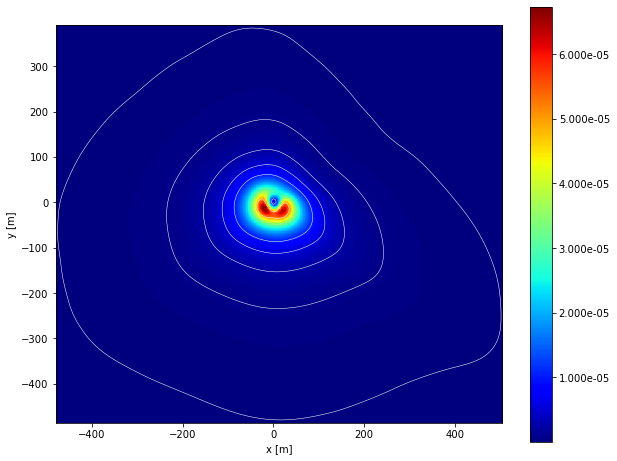

--- 31.325244903564453 seconds ---


In [98]:
dxy = 6.    # grid cell size in m

start_time = time.time()

FFP2 = myfootprint.FFP_climatology(zm=zma,
                                  umean=umeana,
                                  h=ha,
                                  ol=ola,
                                  sigmav=sigmava,
                                  ustar=ustara,
                                  wind_dir=wind_dira,
                                  domain=[-600., 600., -600., 600.],
                                  rs=[10., 50., 60., 70., 80., 90.],
                                  dx=dxy,
                                  dy=dxy,
                                  smooth_data=0,
                                  crop=True,
                                  fig=True
                                 )
print("--- %s seconds ---" % (time.time() - start_time))


Alert(0014):
 No valid z0 passed, using umean.
 Execution continues.

Calculating footprint  1  of  13843
Calculating footprint  693  of  13843
Calculating footprint  1385  of  13843
Calculating footprint  2077  of  13843
Calculating footprint  2769  of  13843
Calculating footprint  3461  of  13843
Calculating footprint  4153  of  13843
Calculating footprint  4845  of  13843
Calculating footprint  5537  of  13843
Calculating footprint  6229  of  13843
Calculating footprint  6921  of  13843
Calculating footprint  7613  of  13843
Calculating footprint  8305  of  13843
Calculating footprint  8997  of  13843
Calculating footprint  9689  of  13843
Calculating footprint  10381  of  13843
Calculating footprint  11073  of  13843
Calculating footprint  11765  of  13843
Calculating footprint  12457  of  13843
Calculating footprint  13149  of  13843
Calculating footprint  13841  of  13843


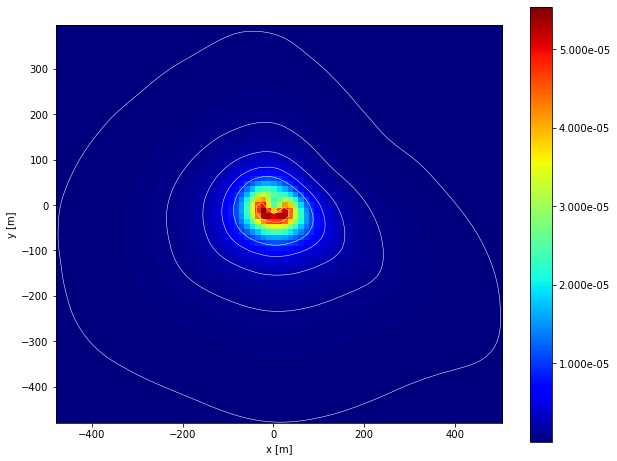

--- 8.332807540893555 seconds ---


In [99]:
dxy = 12.    # grid cell size in m

start_time = time.time()

FFP3 = myfootprint.FFP_climatology(zm=zma,
                                  umean=umeana,
                                  h=ha,
                                  ol=ola,
                                  sigmav=sigmava,
                                  ustar=ustara,
                                  wind_dir=wind_dira,
                                  domain=[-600., 600., -600., 600.],
                                  rs=[10., 50., 60., 70., 80., 90.],
                                  dx=dxy,
                                  dy=dxy,
                                  smooth_data=0,
                                  crop=True,
                                  fig=True
                                 )
print("--- %s seconds ---" % (time.time() - start_time))


Alert(0014):
 No valid z0 passed, using umean.
 Execution continues.

Calculating footprint  1  of  13843
Calculating footprint  693  of  13843
Calculating footprint  1385  of  13843
Calculating footprint  2077  of  13843
Calculating footprint  2769  of  13843
Calculating footprint  3461  of  13843
Calculating footprint  4153  of  13843
Calculating footprint  4845  of  13843
Calculating footprint  5537  of  13843
Calculating footprint  6229  of  13843
Calculating footprint  6921  of  13843
Calculating footprint  7613  of  13843
Calculating footprint  8305  of  13843
Calculating footprint  8997  of  13843
Calculating footprint  9689  of  13843
Calculating footprint  10381  of  13843
Calculating footprint  11073  of  13843
Calculating footprint  11765  of  13843
Calculating footprint  12457  of  13843
Calculating footprint  13149  of  13843
Calculating footprint  13841  of  13843


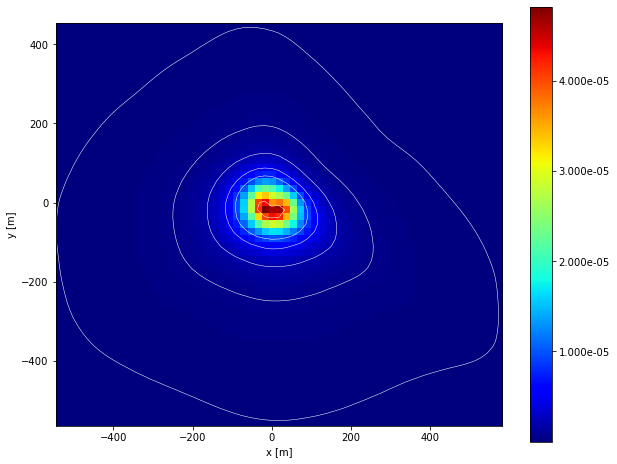

--- 4.425737619400024 seconds ---


In [116]:
dxy = 18.    # grid cell size in m

start_time = time.time()

FFP3a = myfootprint.FFP_climatology(zm=zma,
                                  umean=umeana,
                                  h=ha,
                                  ol=ola,
                                  sigmav=sigmava,
                                  ustar=ustara,
                                  wind_dir=wind_dira,
                                  domain=[-600., 600., -600., 600.],
                                  rs=[10., 50., 60., 70., 80., 90.],
                                  dx=dxy,
                                  dy=dxy,
                                  smooth_data=0,
                                  crop=True,
                                  fig=True
                                 )
print("--- %s seconds ---" % (time.time() - start_time))


Alert(0014):
 No valid z0 passed, using umean.
 Execution continues.

Calculating footprint  1  of  13843
Calculating footprint  693  of  13843
Calculating footprint  1385  of  13843
Calculating footprint  2077  of  13843
Calculating footprint  2769  of  13843
Calculating footprint  3461  of  13843
Calculating footprint  4153  of  13843
Calculating footprint  4845  of  13843
Calculating footprint  5537  of  13843
Calculating footprint  6229  of  13843
Calculating footprint  6921  of  13843
Calculating footprint  7613  of  13843
Calculating footprint  8305  of  13843
Calculating footprint  8997  of  13843
Calculating footprint  9689  of  13843
Calculating footprint  10381  of  13843
Calculating footprint  11073  of  13843
Calculating footprint  11765  of  13843
Calculating footprint  12457  of  13843
Calculating footprint  13149  of  13843
Calculating footprint  13841  of  13843


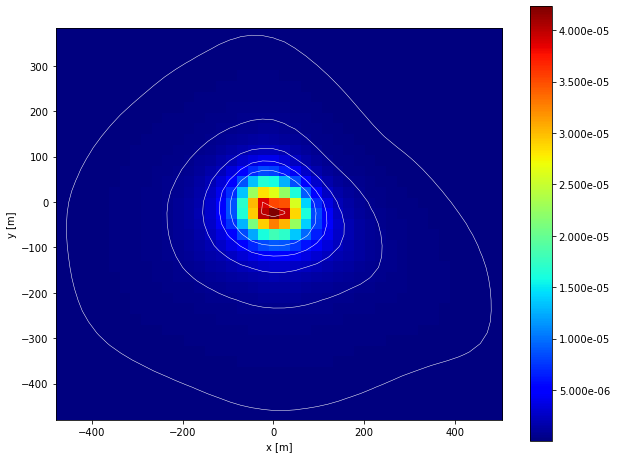

--- 2.7821044921875 seconds ---


In [100]:
dxy = 24.    # grid cell size in m

start_time = time.time()

FFP4 = myfootprint.FFP_climatology(zm=zma,
                                  umean=umeana,
                                  h=ha,
                                  ol=ola,
                                  sigmav=sigmava,
                                  ustar=ustara,
                                  wind_dir=wind_dira,
                                  domain=[-600., 600., -600., 600.],
                                  rs=[10., 50., 60., 70., 80., 90.],
                                  dx=dxy,
                                  dy=dxy,
                                  smooth_data=0,
                                  crop=True,
                                  fig=True
                                 )
print("--- %s seconds ---" % (time.time() - start_time))


Alert(0014):
 No valid z0 passed, using umean.
 Execution continues.

Calculating footprint  1  of  13843
Calculating footprint  693  of  13843
Calculating footprint  1385  of  13843
Calculating footprint  2077  of  13843
Calculating footprint  2769  of  13843
Calculating footprint  3461  of  13843
Calculating footprint  4153  of  13843
Calculating footprint  4845  of  13843
Calculating footprint  5537  of  13843
Calculating footprint  6229  of  13843
Calculating footprint  6921  of  13843
Calculating footprint  7613  of  13843
Calculating footprint  8305  of  13843
Calculating footprint  8997  of  13843
Calculating footprint  9689  of  13843
Calculating footprint  10381  of  13843
Calculating footprint  11073  of  13843
Calculating footprint  11765  of  13843
Calculating footprint  12457  of  13843
Calculating footprint  13149  of  13843
Calculating footprint  13841  of  13843


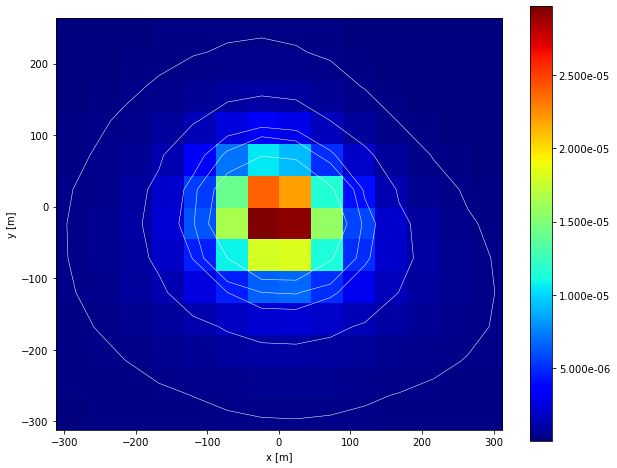

--- 1.3892993927001953 seconds ---


In [101]:
dxy = 48.    # grid cell size in m

start_time = time.time()

FFP5 = myfootprint.FFP_climatology(zm=zma,
                                  umean=umeana,
                                  h=ha,
                                  ol=ola,
                                  sigmav=sigmava,
                                  ustar=ustara,
                                  wind_dir=wind_dira,
                                  domain=[-600., 600., -600., 600.],
                                  rs=[10., 50., 60., 70., 80., 90.],
                                  dx=dxy,
                                  dy=dxy,
                                  smooth_data=0,
                                  crop=True,
                                  fig=True
                                 )
print("--- %s seconds ---" % (time.time() - start_time))


Alert(0014):
 No valid z0 passed, using umean.
 Execution continues.

Calculating footprint  1  of  13843
Calculating footprint  693  of  13843
Calculating footprint  1385  of  13843
Calculating footprint  2077  of  13843
Calculating footprint  2769  of  13843
Calculating footprint  3461  of  13843
Calculating footprint  4153  of  13843
Calculating footprint  4845  of  13843
Calculating footprint  5537  of  13843
Calculating footprint  6229  of  13843
Calculating footprint  6921  of  13843
Calculating footprint  7613  of  13843
Calculating footprint  8305  of  13843
Calculating footprint  8997  of  13843
Calculating footprint  9689  of  13843
Calculating footprint  10381  of  13843
Calculating footprint  11073  of  13843
Calculating footprint  11765  of  13843
Calculating footprint  12457  of  13843
Calculating footprint  13149  of  13843
Calculating footprint  13841  of  13843


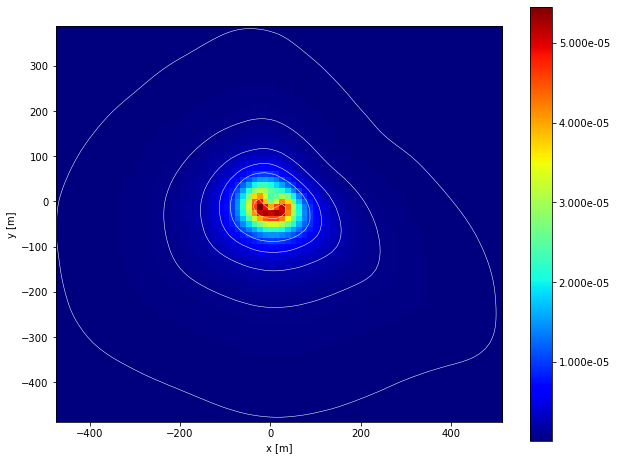

--- 344.46822118759155 seconds ---


In [14]:
# Running the Kljun model with an ensemble of three dummy data sets

dxy = 12.5

import time
start_time = time.time()


FFPz = myfootprint.FFP_climatology(zm=zma,
                                  umean=umeana,
                                  h=ha,
                                  ol=ola,
                                  sigmav=sigmava,
                                  ustar=ustara,
                                  wind_dir=wind_dira,
                                  domain=[-4000., 4000., -4000., 4000.],
                                  rs=[10., 50., 60., 70., 80., 90.],
                                  dx=dxy,
                                  dy=dxy,
                                  smooth_data=0,
                                  crop=True,
                                  fig=True
                                 )
print("--- %s seconds ---" % (time.time() - start_time))

In [102]:
# This error flag need to be checked!
#
# In case it is 1 an error ocurred
# In case it is 2 not all contours are in the domain!   

[FFP["flag_err"],FFP2["flag_err"],FFP3["flag_err"],FFP4["flag_err"],FFP5["flag_err"]]


[0, 0, 0, 0, 2]

In [103]:
# Check the length of the contour vectors

len(FFP["xr"])

6

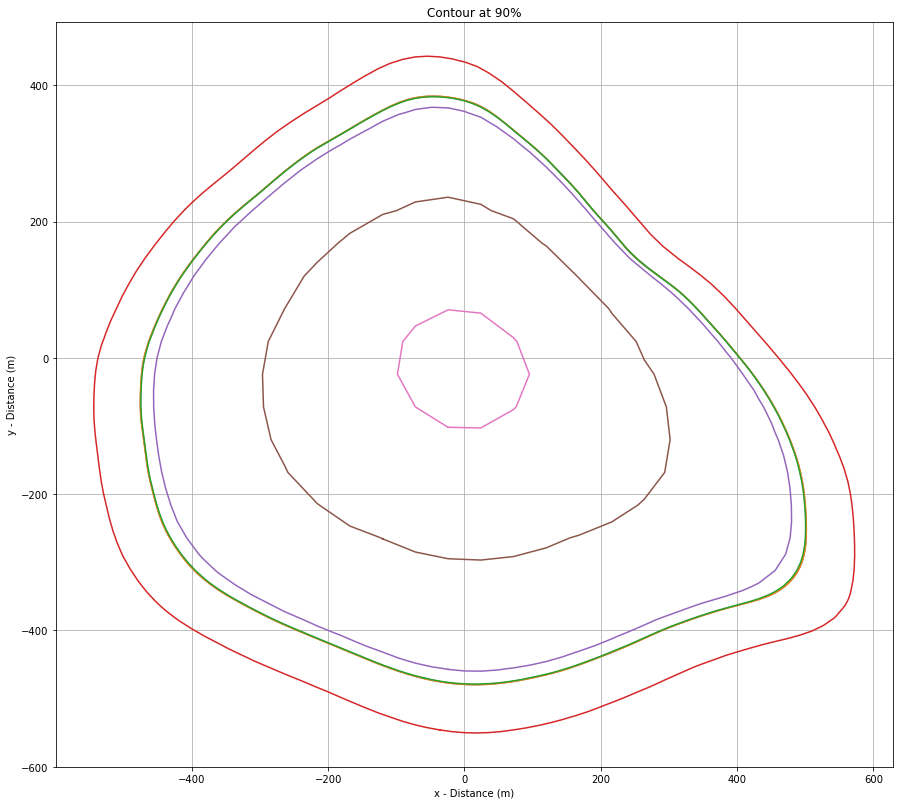

In [125]:
# Plot the 90% contour 
#
# CAUTION: Only possible if flag_err = 0! Then it's the last entry in xr!

x = FFP["xr"][-1]
y = FFP["yr"][-1]

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot()
ax.plot(x, y)
ax.plot(FFP2["xr"][-1], FFP2["yr"][-1])
ax.plot(FFP3["xr"][-1], FFP3["yr"][-1])
ax.plot(FFP3a["xr"][-1], FFP3a["yr"][-1])
ax.plot(FFP4["xr"][-1], FFP4["yr"][-1])
ax.plot(FFP5["xr"][-1], FFP5["yr"][-1])
ax.plot(FFP5["xr"][1], FFP5["yr"][1])
ax.grid()
ax.set_aspect(1)
plt.title('Contour at 90%')
plt.xlabel('x - Distance (m)')
plt.ylabel('y - Distance (m)')
#plt.axes().set_aspect('1', 'datalim')
plt.show()

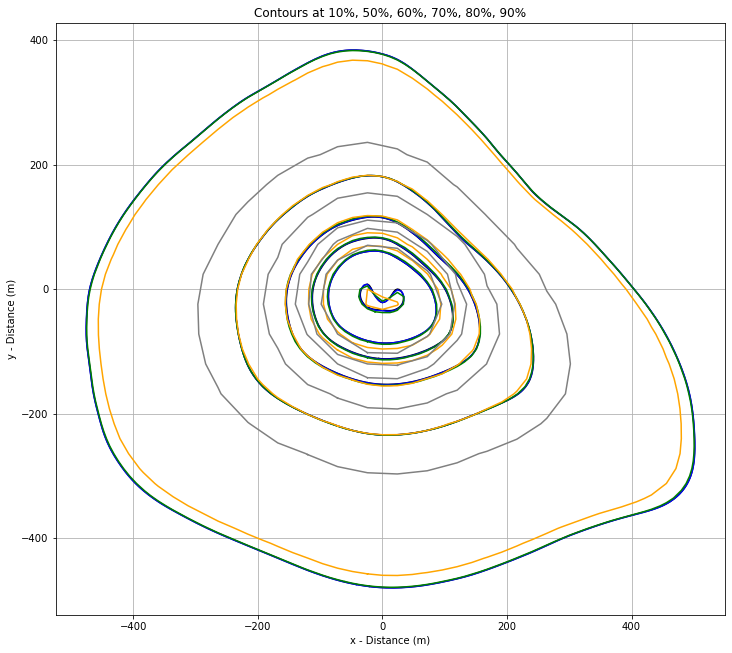

In [115]:
# Plot all the contours
#
# We have given three levels 10,50 and 90%!
# The three wind directions (10, 130 and 200 degree) determine the direction of the 
# elliptic 2D footprint area.

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot()

for i in range(len(FFP["xr"])):
    ax.plot(FFP["xr"][i], FFP["yr"][i],color='black')
    ax.plot(FFP2["xr"][i], FFP2["yr"][i],color='blue')
    ax.plot(FFP3["xr"][i], FFP3["yr"][i],color='green')
    ax.plot(FFP4["xr"][i], FFP4["yr"][i],color='orange')
    
ax.plot(FFP5["xr"][1], FFP5["yr"][1],color='gray')
ax.plot(FFP5["xr"][2], FFP5["yr"][2],color='gray')
ax.plot(FFP5["xr"][3], FFP5["yr"][3],color='gray')
ax.plot(FFP5["xr"][4], FFP5["yr"][4],color='gray')
ax.plot(FFP5["xr"][5], FFP5["yr"][5],color='gray')

ax.grid()
ax.set_aspect(1)
plt.title('Contours at 10%, 50%, 60%, 70%, 80%, 90%')
plt.xlabel('x - Distance (m)')
plt.ylabel('y - Distance (m)')
#plt.axes().set_aspect('1', 'datalim')
plt.savefig('FP_2019_30m')

In [126]:
for i in range(len(FFP['xr'])):
    print([len(FFP['xr'][i]), len(FFP2['xr'][i]),len(FFP3['xr'][i]),len(FFP3a['xr'][i]),len(FFP4['xr'][i])])
    
print('FFP5')
print(['0 = none', len(FFP5['xr'][1]),len(FFP5['xr'][2]),len(FFP5['xr'][3]),len(FFP5['xr'][4]),len(FFP5['xr'][5])])

[90, 44, 22, 13, 9]
[212, 108, 56, 38, 27]
[280, 138, 70, 48, 34]
[386, 194, 96, 66, 48]
[596, 300, 150, 104, 72]
[1226, 614, 304, 232, 149]
FFP5
['0 = none', 14, 18, 22, 30, 46]


In [107]:
FFP5['xr']

[None,
 [-24.0,
  24.0,
  72.0,
  75.83517146071657,
  95.34865066628709,
  76.99114206095301,
  72.0,
  24.0,
  -24.0,
  -72.0,
  -90.48178526374325,
  -98.35919667889777,
  -72.0,
  -24.0],
 [24.0,
  29.783189715100114,
  72.0,
  108.2105684823418,
  116.06314433462848,
  104.5019724907272,
  72.0,
  54.10691017968642,
  24.0,
  -24.0,
  -72.0,
  -78.9060592614224,
  -114.10284436473484,
  -118.33134811912515,
  -105.15509766595474,
  -72.0,
  -24.0,
  24.0],
 [-24.0,
  24.0,
  72.0,
  82.5126937079609,
  120.0,
  127.2050298321015,
  135.23815573038527,
  120.0,
  117.30723852163898,
  78.89668635277572,
  72.0,
  24.0,
  -24.0,
  -72.0,
  -103.70022889820675,
  -120.0,
  -132.73035429723177,
  -139.85731579451925,
  -121.34314494652125,
  -120.0,
  -72.0,
  -24.0],
 [-72.0,
  -24.0,
  24.0,
  72.00000000000001,
  102.63730341115246,
  120.0,
  167.24830461027156,
  168.0,
  188.04851797298485,
  183.7707563812705,
  168.0,
  163.82896192120833,
  132.48918337628263,
  120.0,
  72.0

In [108]:
#Arvutan koordinaadid 90%
# Here it's wrong! The number of vectors is 6 (10-50-60-70-80-90) and the last vector is
# with number 6! See above len(FFP['xr']) equals 6. Therefore you save just the 60% vector as 90%! 

#coordinates2019_90_70m=pd.DataFrame(list(zip(FFP["xr"][2], FFP["yr"][2])),columns=["xr", "yr"])

# the shortcut notation for "last entry" is -1!
#
coordinates2019_90_30m=pd.DataFrame(list(zip(FFP["xr"][-1], FFP["yr"][-1])),columns=["xr", "yr"])

In [109]:
coordinates2019_90_30m.to_csv('coordinates2019_90_30m.csv')

In [110]:
#Arvutan koordinaadid 10%
coordinates2019_10_30m=pd.DataFrame(list(zip(FFP["xr"][0], FFP["yr"][0])),columns=["xr", "yr"])

In [111]:
coordinates2019_10_30m.to_csv('coordinates2019_10_30m.csv')

In [112]:
#file_to_write = open('FFP_2015_30_m_zm.pickle', 'wb')
#pkl.dump(FFP_2015_30_m_zm , file_to_write)

with open('FFP_2015_30_m_zm.pickle', 'wb') as handle:
    pkl.dump(FFP, handle, protocol=pkl.HIGHEST_PROTOCOL)

# year - replace with a year of the footprint
# HEIGHT - replace with z (measurement height)